In [1]:
import numpy as np

from matplotlib import pyplot as plt
from snn.resonator import create_excitatory_resonator, test_frequency, create_excitatory_inhibitory_resonator


In [2]:
def custom_resonator_output_spikes(
        freq0,
        clk_freq=int(1.536 * (10 ** 6)) * 2,
        step=1/12_000,
        save_figure=False):
    my_resonator = create_excitatory_inhibitory_resonator(freq0=freq0, clk_freq=clk_freq)
    # plot_network(my_resonator)
    # my_resonator = create_excitatory_inhibitory_resonator(freq0=freq0, clk_freq=clk_pulse)
    log_neuron_potentials = []
    for i in log_neuron_potentials:
        my_resonator.log_membrane_potential(i)
    my_resonator.log_out_spikes(-1)
    # plot_network(my_resonator.network)
    start_freq = 0
    spectrum = 70#2 * float(freq0)
    test_size = int(spectrum / step)
    spikes_neuron = my_resonator.neurons[-1]

    spikes_neuron.membrane_sample_max_window = np.zeros(1).astype('float32')
    test_frequency(
        my_resonator,
        start_freq=start_freq,
        step=step,
        test_size=test_size,
        clk_freq=clk_freq
    )

    for i in log_neuron_potentials:
        membrane_neuron = my_resonator.neurons[i]
        y_membrane = membrane_neuron.membrane_potential_graph()
        x = np.linspace(start_freq, start_freq + spectrum, len(y_membrane))
        plt.title(f'membrane potential f={freq0}, neuron={i}')
        plt.plot(x, y_membrane)
        plt.show()

    y_spikes = spikes_neuron.out_spikes[:spikes_neuron.index]

    # np.savez_compressed(f'output_{freq0}.npz',
    #                     membrane=y_membrane,
    #                     spikes=y_spikes)

    spikes_window_size = clk_freq
    y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    x = np.linspace(start_freq, start_freq + spectrum, len(y_spikes))
    plt.title(f'spikes in window of {spikes_window_size} freq: {freq0}')
    if save_figure:
        # plt.savefig(f'../filters/clk_{clk_freq}/figures/f_{100}.PNG', bbox_inches='tight')
        plt.savefig('plot.png', dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.plot(x, y_spikes)
        plt.show()

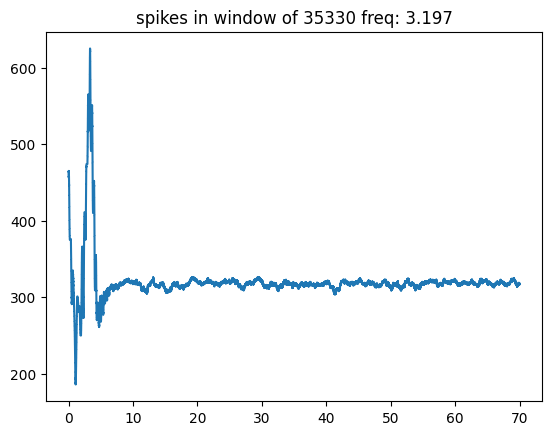

In [17]:
custom_resonator_output_spikes(freq0='3.197', clk_freq=35330, step=1/35330)

<string>:3: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.


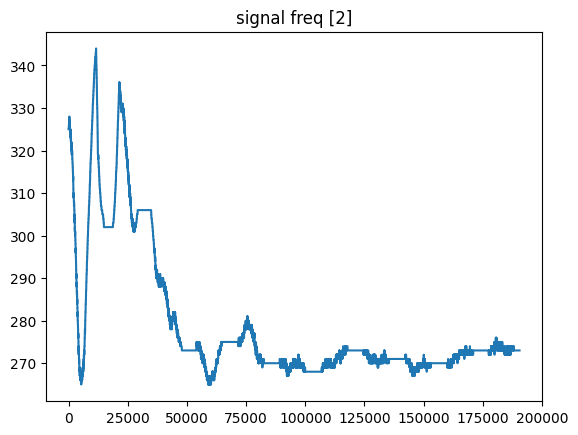

In [3]:
def plot_resonator_on_freq(signal_freq, steps, clk_freq=3072000, resonator_freq='200', show=True, weights=None):
    # my_resonator = create_excitatory_resonator(freq0=100, clk_freq=1536000)
    my_resonator = create_excitatory_inhibitory_resonator(freq0=resonator_freq, clk_freq=clk_freq)
    steps *= clk_freq
    steps = int(steps)

    my_resonator.log_out_spikes(-1)
    spikes_neuron = my_resonator.neurons[-1]
    spikes_neuron.membrane_sample_max_window = np.zeros(1).astype('float32')

    spectrum = 2 * float(resonator_freq)
    if type(signal_freq) is not list:
        signal_freq = [signal_freq]

    weights = weights or np.ones(len(signal_freq))

    x = np.linspace(0, spectrum, int(spectrum * steps))
    t = x * 2 * np.pi * signal_freq[0]
    sine_wave = np.sin(t) * weights[0]
    for w, f in zip(weights[1:], signal_freq[1:]):
        t = x * 2 * np.pi * f
        sine_wave += np.sin(t) * w

    sine_wave /= np.max(sine_wave)

    # xlen = len(x)
    # x = x[int(xlen*0.45):int(xlen*0.55)]

    my_resonator.input_full_data(sine_wave)

    spikes_window_size = steps
    y_spikes = spikes_neuron.out_spikes[:spikes_neuron.index]
    y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    plt.title(f'signal freq {signal_freq}')
    plt.plot(np.arange(len(y_spikes)), y_spikes, label=signal_freq)
    if show:
        plt.show()

plot_resonator_on_freq(2, steps=1, clk_freq=35330, resonator_freq='3.197')

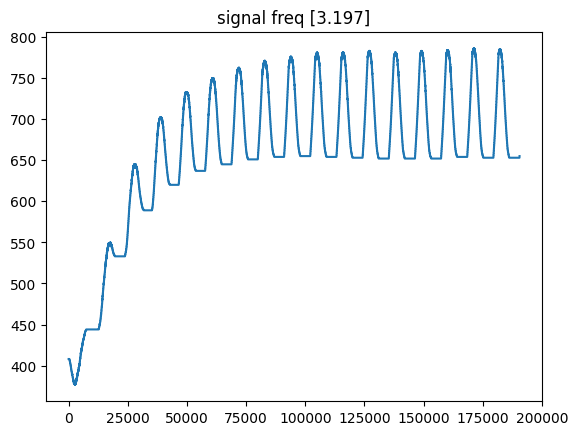

In [37]:
plot_resonator_on_freq(3.197, steps=1, clk_freq=35330, resonator_freq='3.197', weights=[10])

C:\Users\User\AppData\Local\Temp\ipykernel_21860\2775136595.py:24: RuntimeWarning: invalid value encountered in true_divide
  sine_wave /= np.max(sine_wave)


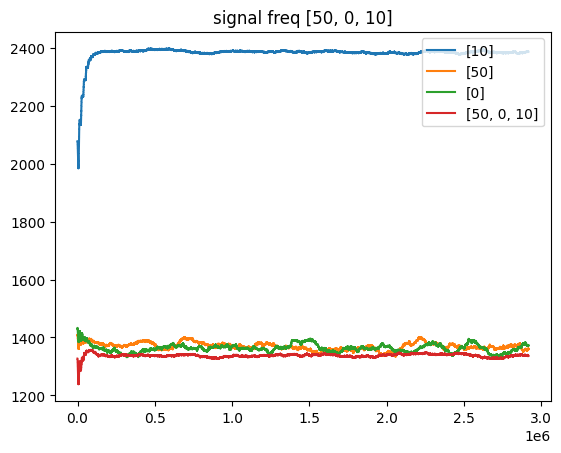

In [6]:
clk_freq = 153600
resonator_freq = '10.000'
# plot_resonator_on_freq(2.12, steps=1, clk_freq=35330, resonator_freq='3.197', show=False)
plot_resonator_on_freq(10, steps=1, clk_freq=clk_freq, resonator_freq=resonator_freq, show=False)
plot_resonator_on_freq(50, steps=1, clk_freq=clk_freq, resonator_freq=resonator_freq, show=False)
plot_resonator_on_freq(0, steps=1, clk_freq=clk_freq, resonator_freq=resonator_freq, show=False)
plot_resonator_on_freq([50, 0, 10], weights=[1, 1, 1], steps=1, clk_freq=clk_freq, resonator_freq=resonator_freq, show=False)
plt.legend(loc="upper right")
plt.show()

0.0 76800.0


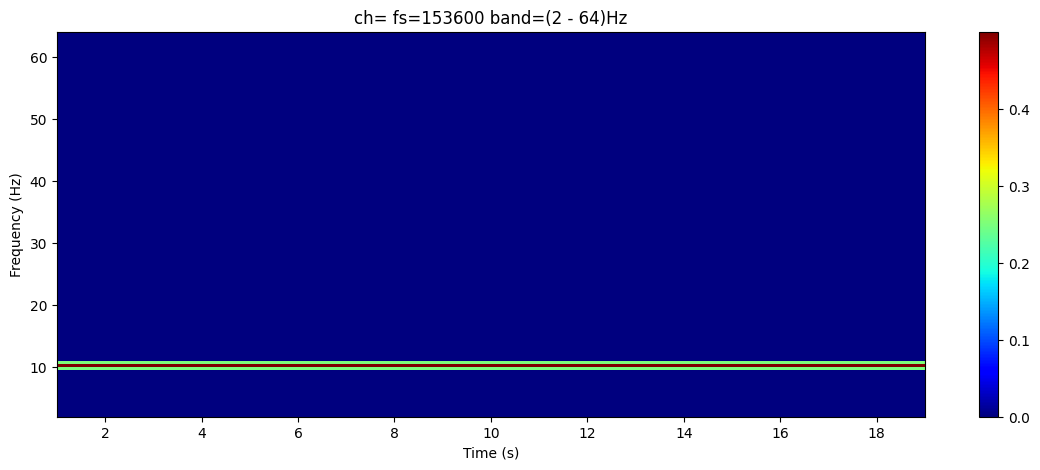

In [66]:
x = np.linspace(0, 20, int(20 * 153600))
signal_freq = [10]
t = x * 2 * np.pi * signal_freq[0]
sine_wave = np.sin(t)
for f in signal_freq[1:]:
    t = x * 2 * np.pi * f
    sine_wave += np.sin(t)
fft_spectogram = plot_spectrogram(sine_wave, channel_name='', fs=153600, fmin=2, fmax=64, show=True)

# fig, ax1 = plt.subplots()
# res = ax1.specgram(sine_wave, Fs=153600, cmap='jet')
# ax1.set_title('matplotlib.axes.Axes.specgram() Example')

In [65]:
from scipy.signal import resample

# number of samples in the original and resampled signals
def resample_signal(f_new, f_source, data):
    n_samples_orig = data.shape[0]
    n_samples_new = int(n_samples_orig * f_new / f_source)

    # resample the signal
    return resample(data, n_samples_new)

def plot_spectrogram(data, channel_name, fs, fmin, fmax, show=True):
    # plot the spectrogram
    plt.figure(figsize=(14, 5))
    Sxx, freqs, bins, im = plt.specgram(data, NFFT=fs*2, Fs=fs,
                                        noverlap=fs, cmap='jet',
                                        scale='linear', mode='magnitude')
    # plt.vlines([600, 1200], ymin=fmin, ymax=fmax, colors='black')
    plt.ylim(fmin, fmax)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'ch={channel_name} fs={fs} band=({fmin} - {fmax})Hz')
    print(freqs[0], freqs[-1])
    plt.imshow(Sxx, aspect='auto',
               cmap='jet', origin='lower',
               extent=[bins[0], bins[-1], freqs[0], freqs[-1]],
               vmin=0, vmax=np.max(Sxx[(freqs >= fmin) & (freqs <= fmax)]))
    plt.colorbar()
    if show:
        plt.show()
    return Sxx


def fft_spectogram2bins(Sxx, window):
    bins_count = len(Sxx[0])//window + 1
    bin_sxx = np.zeros((4, bins_count))

    # dict to array
    for ch_i, (f_min, f_max) in enumerate(channels.values()):
        for i in range(bins_count):
            bin_sxx[ch_i][i] = np.sum(Sxx[f_min:f_max, i*window:(i+1)*window]) / (f_max - f_min)
        bin_sxx[ch_i][i] = np.sum(Sxx[f_min:f_max, i*window:]) / (f_max - f_min)

    return bin_sxx

def plot_bins(Sxx, duration, labels, annotate=True, rotate_annotate=False):
    fig, ax = plt.subplots(figsize=(14, 5))
    im = ax.imshow(Sxx, aspect='auto',
               cmap='jet', origin='lower',
               extent=[0, duration, 0, len(Sxx)]
               )

    ax.set_yticks(np.arange(len(Sxx)), labels=labels)
    if annotate:
        bin_size = duration / len(Sxx[0])
        rotation_degree = 90 * rotate_annotate
        for i in range(len(Sxx)):
            for j in range(len(Sxx[i])):
                text = ax.text(j * bin_size + bin_size*.5, i + .5,  f'{Sxx[i, j]:.4f}',
                               rotation=rotation_degree,
                               ha="center", va="center", color="white")

    fig.tight_layout()
    fig.colorbar(im, ax=ax)
    plt.show()

Peaks at T=1: 1
Peaks at T=100: 101
Peaks at T=150: 151
Peaks at T=300: 301


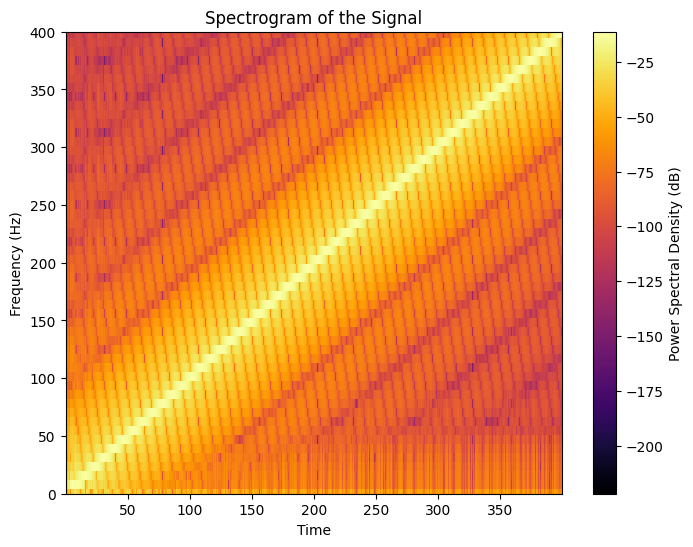

In [5]:
from scipy.signal import chirp, spectrogram
import numpy as np

def count_peaks(signal):
    peaks = 0
    for i in range(1, len(signal) - 1):
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
            peaks += 1
    return peaks

freqs = 400
f0 = 200
sample_rate = (10 * f0)
clk_freq = sample_rate
x = np.linspace(0, freqs, freqs * sample_rate)
x = x * 2 * np.pi / clk_freq
y = np.cumsum(x)
y = np.sin(y)
print(f'Peaks at T=1: {count_peaks(y[1 * sample_rate:2 * sample_rate])}')
print(f'Peaks at T=100: {count_peaks(y[100 * sample_rate:101 * sample_rate])}')
print(f'Peaks at T=150: {count_peaks(y[150 * sample_rate:151 * sample_rate])}')
print(f'Peaks at T=300: {count_peaks(y[300 * sample_rate:301 * sample_rate])}')
# plt.plot(y[int((2 - .05) * sample_rate):int((2 + .05) * sample_rate)])

# Perform Short-Time Fourier Transform (STFT)
frequencies, times, S = spectrogram(y, fs=sample_rate)

# Plot the spectrogram
plt.figure(figsize=(8, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='auto', cmap='inferno')
plt.colorbar(label='Power Spectral Density (dB)')
plt.title('Spectrogram of the Signal')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, freqs)  # Limit the y-axis to the signal's frequency range
plt.show()

Peaks at T=1: 1
Peaks at T=100: 100
Peaks at T=150: 150
Peaks at T=300: 300


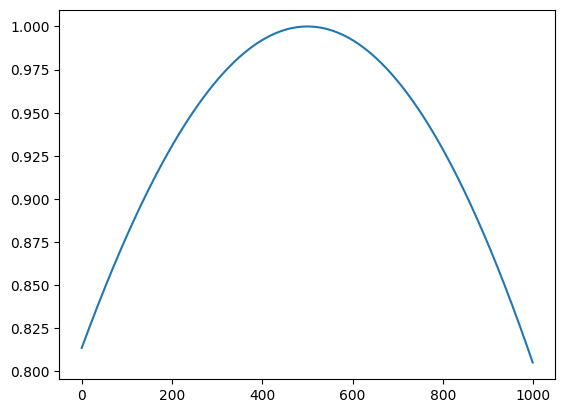

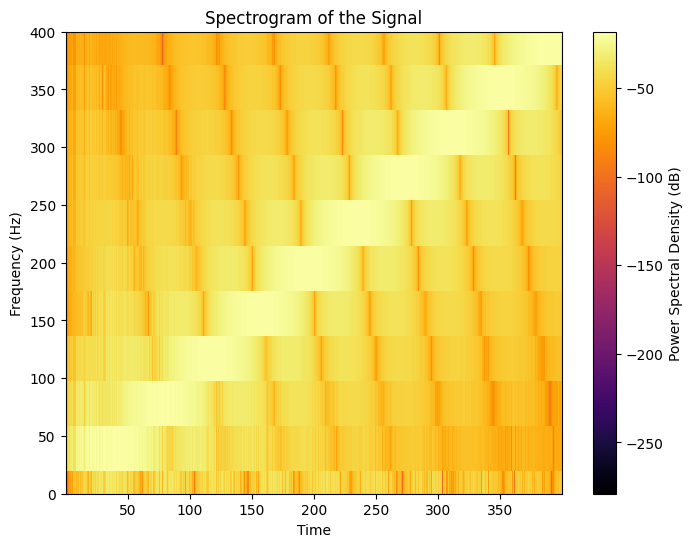

In [248]:
t = np.linspace(0, freqs, freqs*sample_rate)
y = chirp(t, f0=0, f1=freqs, t1=freqs, method='linear')


print(f'Peaks at T=1: {count_peaks(y[1 * sample_rate:2 * sample_rate])}')
print(f'Peaks at T=100: {count_peaks(y[100 * sample_rate:101 * sample_rate])}')
print(f'Peaks at T=150: {count_peaks(y[150 * sample_rate:151 * sample_rate])}')
print(f'Peaks at T=300: {count_peaks(y[300 * sample_rate:301 * sample_rate])}')
plt.plot(y[int((2 - .05) * sample_rate):int((2 + .05) * sample_rate)])

# Perform Short-Time Fourier Transform (STFT)
frequencies, times, S = spectrogram(y, fs=sample_rate)

# Plot the spectrogram
plt.figure(figsize=(8, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='auto', cmap='inferno')
plt.colorbar(label='Power Spectral Density (dB)')
plt.title('Spectrogram of the Signal')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, freqs)  # Limit the y-axis to the signal's frequency range
plt.show()

In [236]:
200*199/2

19900.0